<div style="text-align:center; padding:10px;">
    <h1><b>Predicting County-Level Acute Food Insecurity in Kenya Using Climate, Market, and Conflict Indicators</b></h1>
    <h3>Early Warning System for Acute Food Crisis</h3>
    <p><strong> Capstone Project</strong></p>
    <p style="color:#334155; font-size:14px; margin-top:5px;">👤Authors: Blex Olonde, Dennis Muriungi, Shem Omondi, Jasho Kiplangat, Valary Kones</p>
    <p style="color:#334155; font-size:14px; margin-top:5px;">Date: Feb 25, 2026</p>
</div>
<hr style="height:3px;background-color:#2F855A;border:none;">

## 1. Business Understanding  

### 1.1 Background  

Food insecurity remains a persistent challenge in Kenya, particularly in **Arid and Semi-Arid Lands (ASALs)**, which constitute approximately **80% of the country’s landmass** and are highly vulnerable to drought and rainfall variability.  

Food insecurity severity is measured using the **Integrated Food Security Phase Classification (IPC)** framework, which categorizes outcomes into five phases:

| Phase | Classification | Meaning |
|-------|---------------|----------|
| 1 | **Minimal** | Food needs are met |
| 2 | **Stressed** | Households meet minimum needs but face stress |
| 3 | **Crisis** | Urgent assistance required |
| 4 | **Emergency** | Severe food consumption gaps |
| 5 | **Famine** | Extreme starvation and mortality risk |

**IPC Phase 3 or higher (3+)** indicates acute food insecurity requiring immediate humanitarian intervention.

In Kenya, IPC analyses are coordinated by institutions such as the National Drought Management Authority (NDMA), the Food and Agriculture Organization (FAO), and the World Food Programme (WFP).  

Although these assessments provide valuable situational analysis, they primarily describe current or past conditions rather than predict future deterioration.

---

### 1.2 Problem Statement  

Kenya lacks a simple, data-driven system that predicts which counties are likely to enter **IPC Phase 3+** in advance.  

While early warning indicators such as rainfall variability, staple food prices, conflict events, and past IPC outcomes are available, they are not fully integrated into a short-term predictive framework.  

As a result, humanitarian response remains largely reactive, limiting early intervention and efficient resource allocation.

---

## 2. Project Objectives  

### Primary Objective  

To develop a **county-level machine learning model** that predicts the probability of entering **IPC Phase 3+** one month ahead using climate, market, and conflict indicators.

### Secondary Objectives  

- Construct a clean **county–month panel dataset** integrating multiple data sources.  
- Identify the most significant drivers of acute food insecurity.  
- Compare the performance of Logistic Regression, Random Forest, and XGBoost models.  
- Develop a simple prototype tool for visualizing predicted county-level risk.  

---

## 3. Measuring Success  

### Technical Metrics  

Given the high cost of missing a crisis, the model will prioritize **recall** while maintaining acceptable precision:

- **Recall ≥ 80%** for IPC Phase 3+ events  
- **Precision ≥ 70%**  
- **ROC-AUC ≥ 0.80**  
- Predictions generated at least **one month in advance**

### Practical Success  

- Clear and interpretable county-level risk probabilities  
- Identification of key predictive drivers  
- Usability for planners and policy stakeholders  
- Demonstrated improvement over purely descriptive reporting systems  

## 4. Data Understanding

The project integrates four primary open-access datasets. To ensure consistency for modeling, I am using **cleaned versions** of these datasets, which have been harmonized into a county-month panel format.

### 4.1 IPC Classifications (Target Variable)

- **Source:** [Integrated Food Security Phase Classification (IPC)](https://www.ipcinfo.org/)
- **Description:** Official county-level acute food insecurity phases.
- **Target Logic:** The original quarterly validity periods have been expanded to monthly frequencies. A binary target is defined as:
    - `1 = IPC Phase ≥ 3` (Crisis or worse)
    - `0 = IPC Phase ≤ 2` (Minimal or Stressed)

### 4.2 Environmental Data (Climate & Vegetation Drivers)

- **Source:** [WFP VAM (Vulnerability Analysis and Mapping)](https://dataviz.vam.wfp.org/)
- **Rainfall Indicators:**
    - `r1q`: 1-month rainfall anomaly ratio (compares current rain to the long-term average).
    - `r3q`: 3-month cumulative rainfall anomaly (captures seasonal drought stress).
    - `r1h`: 1-month cumulative rainfallrainfall anomaly ratio (compares current rain to the long-term average).
    - `r3q`: 3-month cumulative rainfall anomaly (captures seasonal drought stress).
- **Vegetation Indicators:**
    - `vim`: Raw NDVI (Normalized Difference Vegetation Index) values, representing absolute greenness/biomass.
    - `viq`: Vegetation Index Quotient, representing vegetation health relative to historical norms.

### 4.3 Food Prices (Market Driver)

- **Source:** [WFP VAM Food Prices / Kenya National Bureau of Statistics](https://price.vam.wfp.org/)
- **Variables:** Monthly maize retail prices (County-level average and monthly percent change).
- **Note:** Maize is utilized as the primary proxy for market-based food access in Kenya.

### 4.4 Conflict Events (Instability Driver)

- **Source:** [ACLED (Armed Conflict Location & Event Data Project)](https://acleddata.com/)
- **Variables:** Monthly county-level counts of `EVENTS` (clashes, protests, etc.) and `FATALITIES`.
- **Note:** This captures local instability that disrupts markets, livelihoods, and humanitarian access.

---

## 5. Data Cleaning and Preprocessing

The following steps were implemented in a separate notebook data_explore.ipynb, to clean individual datasets in preparation for merging:

- **Temporal Alignment:** All features were standardized to a monthly frequency (`YYYY-MM`) and linked to specific Kenyan counties via `PCODE` mapping.
- **Zero-Filling:** For conflict data, months with no recorded activity were filled with `0` to accurately reflect periods of stability.
- **Column Alignment:** Ensured that all datasets had a County and Month column, with County names aligning. 


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Peak into the cleaned datasets
df_ipc = pd.read_csv('../data/cleaned_ipc_final.csv')
print('IPC dataset:')
print(df_ipc.info())
display(df_ipc.head(5))

df_prices = pd.read_csv('../data/cleaned_food_prices.csv')
print('Food Prices dataset:')
print(df_prices.info())
display(df_prices.head(5))

df_conflict = pd.read_csv('../data/cleaned_conflicts.csv')
print('Conflicts dataset:')
print(df_conflict.info())
display(df_conflict.head(5))

df_rain = pd.read_csv('../data/cleaned_rain.csv')
print('Rainfall dataset:')
print(df_rain.info())
display(df_rain.head(5))

df_ndvi = pd.read_csv('../data/cleaned_ndvi.csv')
print('NDVI dataset:')
print(df_ndvi.info())
display(df_ndvi.head(5))


FileNotFoundError: [Errno 2] No such file or directory: '../data/cleaned_ipc_final.csv'

## 5.1 Preprocessing (Missed steps)
Align ipc data months with the rest: I need to create a row for each month and add lag features

In [ ]:
df_ipc.columns
#drop the 'Unnamed: 0' column from all ndvi and ipc datasets
df_ipc.drop(columns=['Unnamed: 0'], inplace=True)
df_ndvi.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# remove rows with date earlier than 2015-01 to align with the other datasets
# turn Month column to a datetime object and filter out rows with date earlier than 2015-
df_ipc['Month'] = pd.to_datetime(df_ipc['Month'], format='%Y-%m').dt.to_period('M')
df_ipc = df_ipc.loc[df_ipc['Month'] >= pd.Period('2015-01')].reset_index(drop=True).copy()

# create a complete date range from 2015-01 to 2025-12 and forward fill the missing values for each county
df_ipc = df_ipc.sort_values(['County','Month'])
df_ipc = df_ipc.set_index('Month').groupby(['County']).resample('M').ffill().drop(columns='County').reset_index()

df_ipc.head(20)

,County,Month,IPC,in_Phase3+
0,Baringo,2015-01,1.217391,0
1,Baringo,2015-02,1.217391,0
2,Baringo,2015-03,1.217391,0
3,Baringo,2015-04,1.130435,0
4,Baringo,2015-05,1.130435,0
5,Baringo,2015-06,1.130435,0
6,Baringo,2015-07,1.173913,0
7,Baringo,2015-08,1.173913,0
8,Baringo,2015-09,1.173913,0
9,Baringo,2015-10,1.130435,0


## 5.2 Feature Engineering
To account for the delayed impact of shocks (e.g., a failed rainy season impacting food security months later), we are going to create lag features for: 
ipc, rainfall and 
 I created **1-month, 2-month, and 3-month lags** for rainfall (`r3q`), vegetation (`viq`), and conflict indicators.


In [ ]:
# create a function to create lag features for ipc,rainfall,ndvi and conflict datasets
def create_lag_features(df,columns,lags=[1,2,3]):
    df = df.sort_values(['County','Month'])
    for col in columns:
        for i in lags:
            df[f'{col}_lag_{i}'] = df.groupby('County')[col].shift(i)
    return df

In [ ]:
# create lag features for ipc, rainfall, ndvi and conflict datasets
df_ipc = create_lag_features(df_ipc,columns=['IPC','in_Phase3+'],lags=[1,2])
df_rain = create_lag_features(df_rain,columns=['r1q','r3q'],lags=[1,2,3])
df_ndvi = create_lag_features(df_ndvi,columns=['vim','viq'],lags=[1,2,3])
df_conflict = create_lag_features(df_conflict,columns=['Fatalities','Events'],lags=[1,2])  

In [ ]:
# standardize month column to datetime format in all datasets
datasets = [df_rain, df_ndvi, df_conflict, df_prices]
for df in datasets:
    df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m').dt.to_period('M')

### Merging all datasets to one main dataframe

In [ ]:
df_merged = (
    df_ipc
    .merge(df_rain, on=['County','Month'], how='left')
    .merge(df_ndvi, on=['County','Month'], how='left')
    .merge(df_conflict, on=['County','Month'], how='left')
    .merge(df_prices, on=['County','Month'], how='left')    
)

print(df_merged.info())
display(df_merged.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6333 entries, 0 to 6332
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   County              6333 non-null   object   
 1   Month               6333 non-null   period[M]
 2   IPC                 6333 non-null   float64  
 3   in_Phase3+          6333 non-null   int64    
 4   IPC_lag_1           6283 non-null   float64  
 5   IPC_lag_2           6233 non-null   float64  
 6   in_Phase3+_lag_1    6283 non-null   float64  
 7   in_Phase3+_lag_2    6233 non-null   float64  
 8   r3q                 5994 non-null   float64  
 9   r1h                 5994 non-null   float64  
 10  r3h                 5994 non-null   float64  
 11  r1q                 5994 non-null   float64  
 12  r1q_lag_1           5947 non-null   float64  
 13  r1q_lag_2           5900 non-null   float64  
 14  r1q_lag_3           5853 non-null   float64  
 15  r3q_lag_1           5

,County,Month,IPC,in_Phase3+,IPC_lag_1,IPC_lag_2,in_Phase3+_lag_1,in_Phase3+_lag_2,r3q,r1h,...,Fatalities,Events,Fatalities_lag_1,Fatalities_lag_2,Events_lag_1,Events_lag_2,maize_price_per_kg,price_lag1,price_lag2,price_pct_change
0,Baringo,2015-01,1.217391,0,NaN,NaN,NaN,NaN,83.577607,16.909585,...,1.0,1.0,NaN,NaN,NaN,NaN,47.0,0.0,0.0,0.000000
1,Baringo,2015-02,1.217391,0,1.217391,NaN,0.0,NaN,73.369926,14.057185,...,1.0,1.0,1.0,NaN,1.0,NaN,47.0,47.0,0.0,0.000000
2,Baringo,2015-03,1.217391,0,1.217391,1.217391,0.0,0.0,41.034449,18.335422,...,0.0,1.0,1.0,1.0,1.0,1.0,38.0,47.0,47.0,-0.191489
3,Baringo,2015-04,1.130435,0,1.217391,1.217391,0.0,0.0,84.964367,144.816952,...,1.0,1.0,0.0,1.0,1.0,1.0,42.0,38.0,47.0,0.105263
4,Baringo,2015-05,1.130435,0,1.130435,1.217391,0.0,0.0,91.392305,129.329858,...,54.0,3.0,1.0,0.0,1.0,1.0,45.0,42.0,38.0,0.071429
5,Baringo,2015-06,1.130435,0,1.130435,1.130435,0.0,0.0,102.741963,97.081927,...,0.0,0.0,54.0,1.0,3.0,1.0,45.0,45.0,42.0,0.000000
6,Baringo,2015-07,1.173913,0,1.130435,1.130435,0.0,0.0,85.348240,70.128478,...,0.0,0.0,0.0,54.0,0.0,3.0,44.0,45.0,45.0,-0.022222
7,Baringo,2015-08,1.173913,0,1.173913,1.130435,0.0,0.0,70.657472,63.189039,...,0.0,0.0,0.0,0.0,0.0,0.0,44.0,44.0,45.0,0.000000
8,Baringo,2015-09,1.173913,0,1.173913,1.173913,0.0,0.0,55.285425,39.314330,...,0.0,0.0,0.0,0.0,0.0,0.0,44.0,44.0,44.0,0.000000
9,Baringo,2015-10,1.130435,0,1.173913,1.173913,0.0,0.0,57.126571,55.324235,...,0.0,0.0,0.0,0.0,0.0,0.0,44.0,44.0,44.0,0.000000


In [ ]:
# Create a mapping dictionary for common inconsistencies
county_fix = {
    'Elgeyo Marakwet': 'Elgeyo-Marakwet',
    'Elgeyo-Marakwet East': 'Elgeyo-Marakwet',
    'Kapenguria': 'West Pokot',
    'Tharaka-Nithi': 'Tharaka Nithi',
    'Taita-Taveta': 'Taita Taveta'
}

# Apply to merged dataframe
df_merged['County'] = df_merged['County'].replace(county_fix)

In [ ]:
df_merged.loc[df_merged['maize_price_per_kg'].isna()]['County'].value_counts()

West Pokot         243
Elgeyo-Marakwet    240
Murang'a           130
Kisii              130
Laikipia           130
Vihiga             130
Nyeri              130
Meru               130
Lamu               130
Siaya              130
Kwale              130
Makueni            130
Busia              130
Kericho            130
Bomet              130
Kirinyaga          130
Trans Nzoia        130
Narok              130
Nandi              130
Migori             130
Embu               130
Kiambu             130
Nyamira            130
Nyandarua          130
Samburu            130
Homa Bay           130
Bungoma            130
Machakos           130
Kakamega           130
Taita Taveta       130
Tharaka Nithi      130
Name: County, dtype: int64

## 5.3 Handling Missing data

In [ ]:
# 1. Fill absolute price with the monthly average of all other counties
df_merged['maize_price_per_kg'] = df_merged['maize_price_per_kg'].fillna(
    df_merged.groupby('Month')['maize_price_per_kg'].transform('mean')
)

# 2. Re-calculate the lags and percent change 
# (Because filling the price won't automatically fill the lags)
df_merged['price_lag1'] = df_merged.groupby('County')['maize_price_per_kg'].shift(1)
df_merged['price_lag2'] = df_merged.groupby('County')['maize_price_per_kg'].shift(2)
df_merged['price_pct_change'] = df_merged.groupby('County')['maize_price_per_kg'].pct_change()

In [ ]:
# Fill Conflict with 0
conflict_cols = ['Fatalities', 'Events', 'Fatalities_lag_1', 'Events_lag_1', 'Fatalities_lag_2', 'Events_lag_2']
df_merged[conflict_cols] = df_merged[conflict_cols].fillna(0)

# Interpolate Climate per county
climate_cols = ['r1q', 'r3q','r1h','r3h','vim', 'viq', 'r1q_lag_1', 'r3q_lag_1', 'vim_lag_1', 'viq_lag_1']
for col in climate_cols:
    df_merged[col] = df_merged.groupby('County')[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [ ]:
df_merged.isna().sum()

County                  0
Month                   0
IPC                     0
in_Phase3+              0
IPC_lag_1              50
IPC_lag_2             100
in_Phase3+_lag_1       50
in_Phase3+_lag_2      100
r3q                     0
r1h                     0
r3h                     0
r1q                     0
r1q_lag_1               0
r1q_lag_2             433
r1q_lag_3             480
r3q_lag_1               0
r3q_lag_2             433
r3q_lag_3             480
vim                     0
viq                     0
vim_lag_1               0
vim_lag_2             433
vim_lag_3             480
viq_lag_1               0
viq_lag_2             433
viq_lag_3             480
Fatalities              0
Events                  0
Fatalities_lag_1        0
Fatalities_lag_2        0
Events_lag_1            0
Events_lag_2            0
maize_price_per_kg      0
price_lag1             47
price_lag2             94
price_pct_change       47
dtype: int64

In [ ]:
# List of columns to re-lag now that the main columns are filled
to_relag = ['r1q', 'r3q', 'vim', 'viq']

for col in to_relag:
    df_merged[f'{col}_lag_1'] = df_merged.groupby('County')[col].shift(1)
    df_merged[f'{col}_lag_2'] = df_merged.groupby('County')[col].shift(2)
    df_merged[f'{col}_lag_3'] = df_merged.groupby('County')[col].shift(3)

# Do the same for Price lags just to be safe
df_merged['price_lag1'] = df_merged.groupby('County')['maize_price_per_kg'].shift(1)
df_merged['price_lag2'] = df_merged.groupby('County')['maize_price_per_kg'].shift(2)

In [ ]:
df_merged['price_pct_change'] = df_merged.groupby('County')['maize_price_per_kg'].pct_change()

In [ ]:
df_merged.isna().sum()

County                  0
Month                   0
IPC                     0
in_Phase3+              0
IPC_lag_1              50
IPC_lag_2             100
in_Phase3+_lag_1       50
in_Phase3+_lag_2      100
r3q                     0
r1h                     0
r3h                     0
r1q                     0
r1q_lag_1              47
r1q_lag_2              94
r1q_lag_3             141
r3q_lag_1              47
r3q_lag_2              94
r3q_lag_3             141
vim                     0
viq                     0
vim_lag_1              47
vim_lag_2              94
vim_lag_3             141
viq_lag_1              47
viq_lag_2              94
viq_lag_3             141
Fatalities              0
Events                  0
Fatalities_lag_1        0
Fatalities_lag_2        0
Events_lag_1            0
Events_lag_2            0
maize_price_per_kg      0
price_lag1             47
price_lag2             94
price_pct_change       47
dtype: int64

In [ ]:
# Drop rows where the longest lags are still NaN
# Using lag_3 and lag_2 as the 'cutoff'
df_final = df_merged.dropna(subset=['r1q_lag_3', 'viq_lag_3', 'IPC_lag_2', 'price_lag2'])

# Check your final count
print(df_final.isnull().sum())
print(f"Total rows remaining: {len(df_final)}")

County                0
Month                 0
IPC                   0
in_Phase3+            0
IPC_lag_1             0
IPC_lag_2             0
in_Phase3+_lag_1      0
in_Phase3+_lag_2      0
r3q                   0
r1h                   0
r3h                   0
r1q                   0
r1q_lag_1             0
r1q_lag_2             0
r1q_lag_3             0
r3q_lag_1             0
r3q_lag_2             0
r3q_lag_3             0
vim                   0
viq                   0
vim_lag_1             0
vim_lag_2             0
vim_lag_3             0
viq_lag_1             0
viq_lag_2             0
viq_lag_3             0
Fatalities            0
Events                0
Fatalities_lag_1      0
Fatalities_lag_2      0
Events_lag_1          0
Events_lag_2          0
maize_price_per_kg    0
price_lag1            0
price_lag2            0
price_pct_change      0
dtype: int64
Total rows remaining: 6186


In [ ]:
df_final.reset_index(drop=True, inplace=True)

## 6. Exploratory Data Analysis

### 6.1 Temporal analysis of Counties in Phase3+ 

<ipython-input-19-2ea6f4e9f69b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Year'] = df_final['Month'].dt.to_timestamp().dt.year


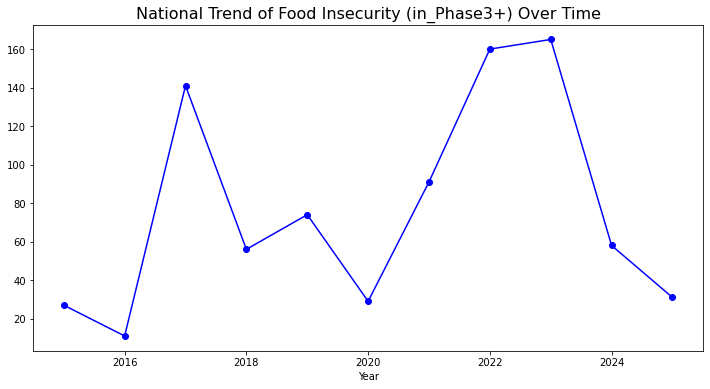

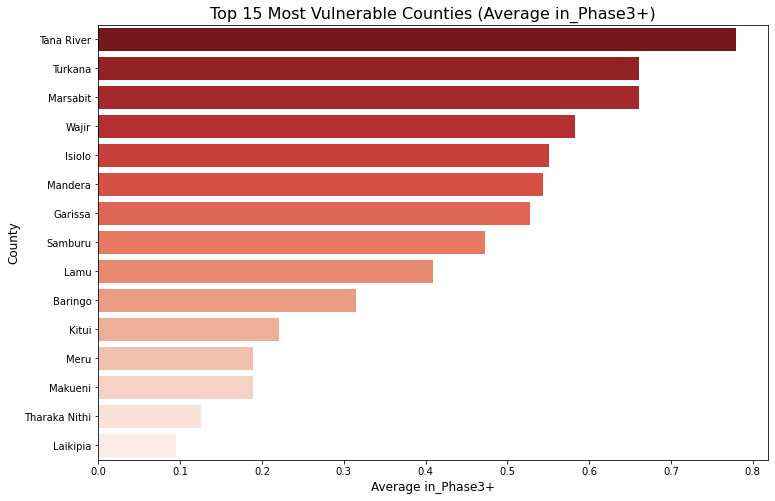

<ipython-input-19-2ea6f4e9f69b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Month_num'] = df_final['Month'].dt.month


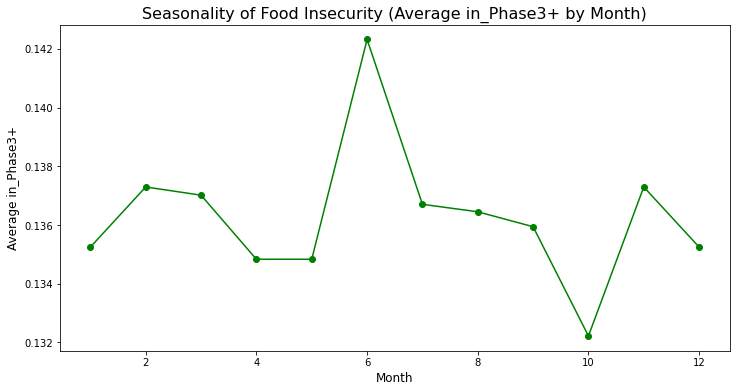

In [ ]:
#National trend of food insecurity over time
df_final['Year'] = df_final['Month'].dt.to_timestamp().dt.year

plt.figure(figsize=(12,6))
national_trend = df_final.groupby(['Year'])['in_Phase3+'].sum()
national_trend.plot(color='blue',marker='o')
plt.title('National Trend of Food Insecurity (in_Phase3+) Over Time', fontsize=16)

# vulnerable counties
plt.figure(figsize=(12,8))
vulnerable_counties = df_final.groupby('County')['in_Phase3+'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=vulnerable_counties.values, y=vulnerable_counties.index, palette='Reds_r')
plt.title('Top 15 Most Vulnerable Counties (Average in_Phase3+)', fontsize=16)
plt.xlabel('Average in_Phase3+', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.show()

# Seasonality analysis
plt.figure(figsize=(12,6))
df_final['Month_num'] = df_final['Month'].dt.month
seasonality = df_final.groupby('Month_num')['in_Phase3+'].mean()
seasonality.plot(color='green', marker='o')
plt.title('Seasonality of Food Insecurity (Average in_Phase3+ by Month)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average in_Phase3+', fontsize=12)
plt.show()


## 6.2 Heatmap showing feature correlation with target

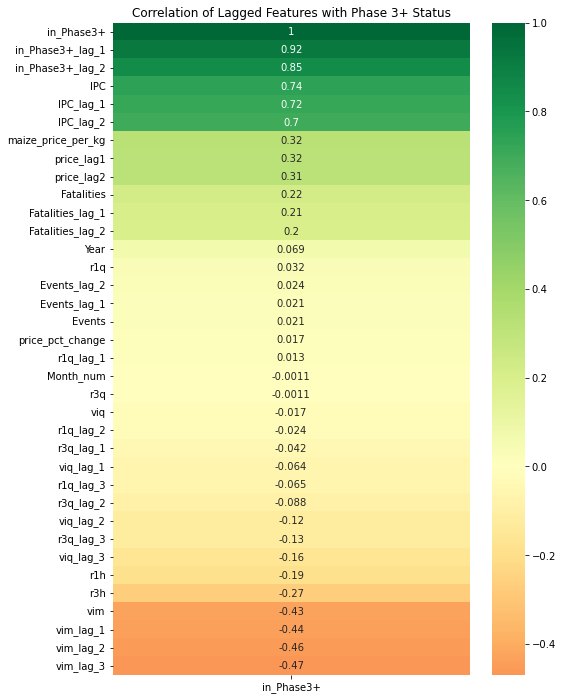

In [ ]:

# 1. Select the target and your lagged features
features = [col for col in df_final.columns]
corr_matrix = df_final[features].corr()

# 2. Focus specifically on the relationship with the Target
target_corr = corr_matrix[['in_Phase3+']].sort_values(by='in_Phase3+', ascending=False)

# 3. Plot
plt.figure(figsize=(8, 12))
sns.heatmap(target_corr, annot=True, cmap='RdYlGn', center=0)
plt.title("Correlation of Lagged Features with Phase 3+ Status")
plt.show()

### 1️⃣ Persistence (Very Strong Positive)
- **in_Phase3+_lag_1 (0.92)** **in_Phase3+_lag_2 (0.85)** **IPC_lag_1 (0.72)**  
These are the strongest correlations in the dataset.  
Food insecurity is highly **persistent (“sticky”)** — if a county was in Phase 3+ last month, it is very likely to remain so.

---
### 2️⃣ Vegetation (Moderate Negative – Strongest External Driver)
- **vim_lag_3 (-0.47)**
- **vim_lag_2 (-0.46)**
- **vim_lag_1 (-0.44)**  

Lower vegetation levels are associated with higher IPC Phase 3+ probability.  
Notably, **3-month lag (-0.47)** is stronger than current vegetation, confirming environmental conditions affect food security with a delay.

---

### 3️⃣ Markets (Moderate Positive)
Food prices show consistent positive correlation (~0.32).  
As maize prices rise, the likelihood of Phase 3+ increases. Market pressure appears to be a steady structural driver.

---

### 4️⃣ Conflict (Weak Positive)
Fatalities are more informative than total event counts.  
However, conflict correlations are weaker than vegetation and market effects in this dataset.

---

### 5️⃣ Rainfall (Weak / Mixed Effects)
- **r3h (-0.27)**
- **r1h (-0.19)**
- **r3q (-0.0011)**  

Raw rainfall totals show modest negative correlation, but rainfall anomalies (r3q) are near zero.  
This suggests rainfall may influence food insecurity **non-linearly** (e.g., only extreme deficits matter).



## 6.3 Vegetation variation by ASAL Status 

<ipython-input-21-946fb4f3119d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Region_Type'] = df_final['County'].apply(lambda x: 'Arid/ASAL' if x in asal_counties else 'Non-ASAL')


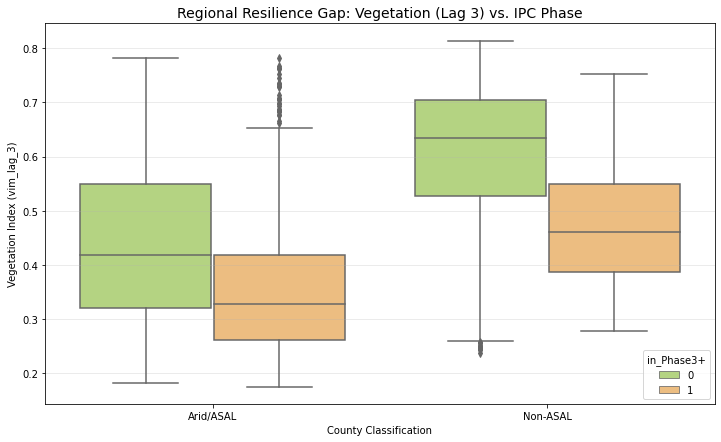

In [ ]:
# 1. Define ASAL (Arid/Semi-Arid) counties for comparison
asal_counties = df_final.groupby('County')['in_Phase3+'].mean().sort_values(ascending=False).head(10).index.tolist()
df_final['Region_Type'] = df_final['County'].apply(lambda x: 'Arid/ASAL' if x in asal_counties else 'Non-ASAL')

# 2. Plotting the Resilience Gap
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_final, x='Region_Type', y='vim_lag_3', hue='in_Phase3+', palette='RdYlGn_r')

plt.title("Regional Resilience Gap: Vegetation (Lag 3) vs. IPC Phase", fontsize=14)
plt.ylabel("Vegetation Index (vim_lag_3)")
plt.xlabel("County Classification")
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis: Regional Resilience & Threshold Variation**

* **Observation:** The boxplot reveals a **disparity in baseline resilience**. Arid counties (ASAL) often maintain "Stable" status at vegetation levels (`vim`) that would trigger a crisis in high-potential agricultural zones.
* **The Tipping Point:** For both regions, there is a clear downward shift in the median vegetation index 3 months prior to a Phase 3+ transition, confirming `vim_lag_3` as a high-fidelity early warning signal.
* **Conclusion:** Because the "Crisis" thresholds differ by region, the predictive model must account for geographic context (e.g., through county-level encoding) rather than applying a single national vegetation threshold.

## 7. Modeling

Class Imbalance in Target Variable (in_Phase3+):
0    86.37
1    13.63
Name: in_Phase3+, dtype: float64


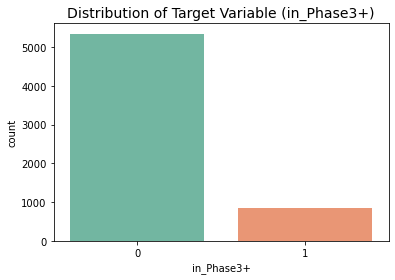

In [ ]:
# checking class imbalance
imbalance = (df_final['in_Phase3+'].value_counts(normalize=True) * 100).round(2)
print(f"Class Imbalance in Target Variable (in_Phase3+):\n{imbalance}")

#visualize the imbalance
sns.countplot(data=df_final, x='in_Phase3+', palette='Set2')
plt.title('Distribution of Target Variable (in_Phase3+)', fontsize=14)
plt.show()

In [ ]:
# Check if the 'Month' column is strictly increasing for every county
is_chronological = df_final.groupby('County')['Month'].apply(lambda x: x.is_monotonic_increasing).all()

if is_chronological:
    print("Data is in perfect chronological order for all counties.")
else:
    print("Data is NOT in order. You must sort before splitting.")

Data is NOT in order. You must sort before splitting.


In [ ]:
# 1. Convert Month to a proper datetime object if it isn't already
df_final['Month'] = pd.to_datetime(df_final['Month'].astype(str))

# 2. Sort by County, then by Month
df_final = df_final.sort_values(by=['County', 'Month']).reset_index(drop=True).copy()

print("Data has been sorted by County and Month.")

Data has been sorted by County and Month.


<ipython-input-24-e7443f3fdf2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Month'] = pd.to_datetime(df_final['Month'].astype(str))


In [ ]:
df_final.describe()

,IPC,in_Phase3+,IPC_lag_1,IPC_lag_2,in_Phase3+_lag_1,in_Phase3+_lag_2,r3q,r1h,r3h,r1q,...,Fatalities_lag_1,Fatalities_lag_2,Events_lag_1,Events_lag_2,maize_price_per_kg,price_lag1,price_lag2,price_pct_change,Year,Month_num
count,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,...,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000,6186.000000
mean,1.406440,0.136275,1.404971,1.404507,0.136114,0.136114,113.220135,100.008685,305.271588,109.245713,...,1.018752,1.009053,2.288231,2.236663,46.628647,46.584096,46.540108,0.002157,2020.066117,6.528613
std,0.596369,0.343109,0.595165,0.594581,0.342937,0.342937,40.134022,87.501404,205.236887,47.566970,...,3.585785,3.584154,4.356749,4.302197,9.106689,9.114312,9.120360,0.048261,3.056778,3.393308
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,31.236395,0.492771,2.997189,21.870374,...,0.000000,0.000000,0.000000,0.000000,13.772222,13.772222,13.772222,-0.374875,2015.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,85.956970,28.297512,144.430850,76.114729,...,0.000000,0.000000,0.000000,0.000000,42.690868,42.690451,42.653021,-0.009702,2017.000000,4.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,107.123858,78.129577,259.754685,102.483853,...,0.000000,0.000000,1.000000,1.000000,46.649479,46.649479,46.649479,0.000000,2020.000000,7.000000
75%,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,131.678636,145.247150,431.232043,132.520569,...,1.000000,1.000000,3.000000,3.000000,48.722083,48.722083,48.722083,0.008052,2023.000000,9.000000
max,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,380.509020,657.024787,1351.112522,448.264643,...,153.000000,153.000000,78.000000,78.000000,100.000000,100.000000,100.000000,0.831250,2025.000000,12.000000


## 7.1 Feature Selection

In [ ]:
df_final['Region_Type'].value_counts()

Non-ASAL     4916
Arid/ASAL    1270
Name: Region_Type, dtype: int64

In [ ]:
df_final['is_ASAL'] = df_final['Region_Type'].apply(lambda x: 1 if x == 'Arid/ASAL' else 0)    

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Select the features you intend to use (excluding the target)
X_vif = df_final[['vim_lag_3', 'r3h', 'maize_price_per_kg', 'Fatalities', 'Events_lag_1','r1q_lag_1','is_ASAL']]

# 2. Add a constant column (intercept) as required by VIF calculation
X_vif = add_constant(X_vif)

# 3. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# 4. Display results (ignoring the 'const' row)
print(vif_data[vif_data['feature'] != 'const'].sort_values(by="VIF", ascending=False))

              feature       VIF
7             is_ASAL  1.763293
2                 r3h  1.700022
1           vim_lag_3  1.506405
6           r1q_lag_1  1.396053
3  maize_price_per_kg  1.207943
4          Fatalities  1.137016
5        Events_lag_1  1.071499


## 7.2 Logistic Regression (baseline model)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay 
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline

In [ ]:
# define x and y
features = ['vim_lag_3', 'r3h', 'maize_price_per_kg', 'Fatalities', 'Events_lag_1','r1q_lag_1']
X = df_final[features]
y = df_final['in_Phase3+']

# perfoming temporal train-test split (based on)
cutoff_date = df_final['Month'].max() - pd.DateOffset(months=12)
train_idx = df_final[df_final['Month'] < cutoff_date].index
test_idx = df_final[df_final['Month'] >= cutoff_date].index

# train test split
X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       597
           1       0.24      0.90      0.37        40

    accuracy                           0.81       637
   macro avg       0.61      0.85      0.63       637
weighted avg       0.94      0.81      0.86       637



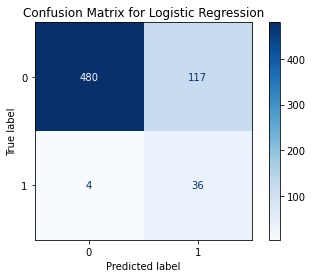

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)  

#print
print("--- Logistic Regression Classification Report ---") 
print(classification_report(y_test, y_pred))


# visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


### **Interpretation of Baseline Logistic Regression**

* **Strengths:** The model achieves a **Recall of 0.90**, indicating it is highly effective at identifying the environmental and economic conditions that lead to a Phase 3+ crisis. This meets the primary objective of an Early Warning System (minimizing False Negatives).
* **Weaknesses:** **Precision is low (0.24)**, leading to a high number of "False Alarms." This suggests that the linear decision boundary of Logistic Regression is over-extrapolating risk, flagging counties that may have high prices or low rain but possess unmeasured resilience (e.g., local aid or alternative income).
* **Next Step Goal:** Moving to **Random Forest** or **XGBoost** aims to improve the **Precision** without sacrificing this high **Recall**. We want to find the non-linear "safety valves" that explain why some counties stay stable despite poor climate indicators.

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Get the raw probabilities instead of the 0/1 predictions
y_probs = pipe.predict_proba(X_test)[:, 1]

# 1. Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)

# 2. Calculate Precision-Recall AUC (also called Average Precision)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

print(f"ROC-AUC Score: {roc_auc:.2F}")
print(f"PR-AUC Score: {pr_auc:.2F}")

ROC-AUC Score: 0.90
PR-AUC Score: 0.26


- ROC-AUC: 0.90 -  indicates the model effectively distinguishes between Phase 3+ and non-Phase 3+ cases across thresholds.

- PR-AUC: 0.26,  suggests limited precision–recall performance, indicating the model struggles to accurately identify Phase 3+ cases, likely due to class imbalance. 

In [ ]:
df_final.columns

Index(['County', 'Month', 'IPC', 'in_Phase3+', 'IPC_lag_1', 'IPC_lag_2',
       'in_Phase3+_lag_1', 'in_Phase3+_lag_2', 'r3q', 'r1h', 'r3h', 'r1q',
       'r1q_lag_1', 'r1q_lag_2', 'r1q_lag_3', 'r3q_lag_1', 'r3q_lag_2',
       'r3q_lag_3', 'vim', 'viq', 'vim_lag_1', 'vim_lag_2', 'vim_lag_3',
       'viq_lag_1', 'viq_lag_2', 'viq_lag_3', 'Fatalities', 'Events',
       'Fatalities_lag_1', 'Fatalities_lag_2', 'Events_lag_1', 'Events_lag_2',
       'maize_price_per_kg', 'price_lag1', 'price_lag2', 'price_pct_change',
       'Year', 'Month_num', 'Region_Type', 'is_ASAL'],
      dtype='object')

## 7.3 Random Forest

In [ ]:
# Define the expanded feature list
rf_features = [
    'vim_lag_1', 'vim_lag_2', 'vim_lag_3','vim', 
    'r3q_lag_1', 'r3q_lag_2', 'r3q_lag_3', 'r3q',
    'r1q_lag_1','r1q','r1h','r3h','maize_price_per_kg', 'price_pct_change', 'price_lag1',
    'Fatalities_lag_1', 'Events_lag_1','Events','Fatalities','is_ASAL'
]

#  define X and y
X = df_final[rf_features]
y = df_final['in_Phase3+']


X_train_rf, X_test_rf = X.loc[train_idx], X.loc[test_idx]
y_train_rf, y_test_rf = y.loc[train_idx], y.loc[test_idx]

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       597
           1       0.34      1.00      0.51        40

    accuracy                           0.88       637
   macro avg       0.67      0.93      0.72       637
weighted avg       0.96      0.88      0.90       637



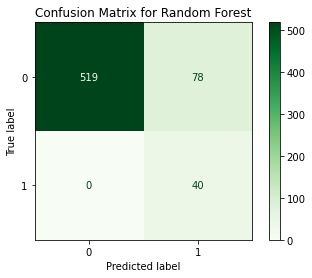

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_model', RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=10, n_estimators=100))
])

pipe_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = pipe_rf.predict(X_test_rf)
print("--- Random Forest Classification Report ---")
print(classification_report(y_test_rf, y_pred_rf))  

# visualize confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=pipe_rf.classes_)
disp_rf.plot(cmap='Greens') 
plt.title("Confusion Matrix for Random Forest")
plt.show()

### Random Forest – Model Performance Summary

The Random Forest model achieves high overall accuracy (88%) and strong performance for the majority class (0), with 87% recall and near-perfect precision (1.00).  

For Phase 3+ cases (class 1), the model captures all true positives (recall = 1.00), but precision is low (0.34), indicating a substantial number of false positives. This suggests the model prioritizes identifying crisis areas but at the cost of over-predicting Phase 3+.

In [ ]:
# calculate roc-auc score
y_probs_rf = pipe_rf.predict_proba(X_test_rf)[:,1]

roc_auc_rf = roc_auc_score(y_test_rf, y_probs_rf)

# print precision-recall AUC
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test_rf, y_probs_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

print(f"ROC-AUC Score for Random Forest: {roc_auc_rf:.2f}")
print(f"PR-AUC Score for Random Forest: {pr_auc_rf:.2f}")

ROC-AUC Score for Random Forest: 0.94
PR-AUC Score for Random Forest: 0.35


### Random Forest – ROC-AUC: 0.94
A ROC-AUC of 0.94 indicates excellent discriminatory power, meaning the model is very effective at ranking Phase 3+ areas above non-Phase 3+ areas across thresholds.

### Random Forest – PR-AUC: 0.35
A PR-AUC of 0.35 shows improved precision–recall performance compared to Logistic Regression, but still reflects moderate difficulty in accurately identifying Phase 3+ cases without generating false positives.

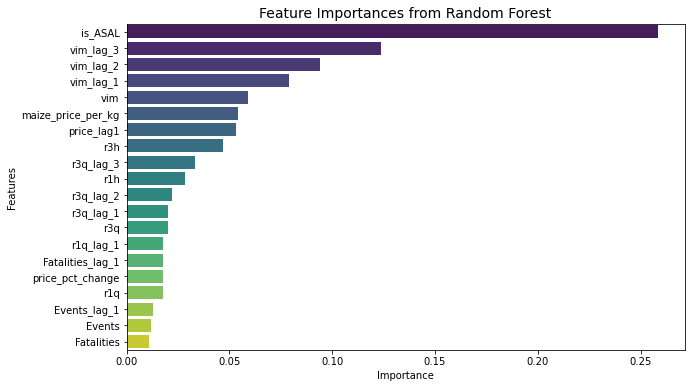

In [ ]:
# Extracting feature importances
importances = pipe_rf.named_steps['rf_model'].feature_importances_
feature_names = X_train_rf.columns
feat_importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance': importances
})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feat_importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest', fontsize=14)    
plt.show()

1. **Regional Context:** The `is_ASAL` flag is the most significant predictor. This validates our decision to include spatial context, as it allows the model to differentiate between arid baseline conditions and agricultural zones.
2. **Predictive Lead Time:** The high importance of `vim_lag_3` relative to current `vim` suggests a 3-month "warning window." Vegetation health from the previous quarter is a primary driver of current food security transitions.
3. **Price Sensitivity:** Market drivers (`maize_price`) rank higher than short-term rainfall shocks (`r1q`). This indicates that while drought starts the problem, the actual transition into a Crisis phase is often finalized by the economic inability of households to purchase food.

## 7.4 XGBoost


In [ ]:
# 1. Prepare your feature list (adding County back in!)
xgb_features = rf_features + ['County']

#  define X and y
X = df_final[xgb_features]
y = df_final['in_Phase3+']

# converting county to category dtype for XGBoost
X['County'] = df_final['County'].astype('category')


X_train_gb, X_test_gb = X.loc[train_idx], X.loc[test_idx]
y_train_gb, y_test_gb = y.loc[train_idx], y.loc[test_idx]


<ipython-input-38-fed84bcd40ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['County'] = df_final['County'].astype('category')


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from xgboost import XGBClassifier

# 2. Separate features by type for the preprocessor
# 'County' gets encoded, everything else gets scaled
cat_features = ['County']
num_features = rf_features

# 3. Build the Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # OrdinalEncoder turns 'County' into integers (needed for XGB version)
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_features),
        ('num', StandardScaler(), num_features)
    ])

# 4. Define the weight (using existing variables)
weight = len(y_train_gb[y_train_gb==0]) / len(y_train_gb[y_train_gb==1])

# 5. Create the Final Pipeline
pipe_xgb = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=weight,
        random_state=42,

    ))
])

# 6. Fit using X_train_gb and y_train_gb
# Note: Ensure X_train_gb still has the 'County' column!
pipe_xgb.fit(X_train_gb, y_train_gb)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['County']),
                                                 ('num', StandardScaler(),
                                                  ['vim_lag_1', 'vim_lag_2',
                                                   'vim_lag_3', 'vim',
                                                   'r3q_lag_1', 'r3q_lag_2',
                                                   'r3q_lag_3', 'r3q',
                                                   'r1q_lag_1', 'r1q', 'r1h',
                                                   'r3h', 'maize_price_per_kg',
                                                   'price_pct_change',
                                                   'price_lag1',
                                                   'Fatalities_lag...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=5.910336239103362, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       597
           1       0.30      1.00      0.46        40

    accuracy                           0.85       637
   macro avg       0.65      0.92      0.69       637
weighted avg       0.96      0.85      0.89       637



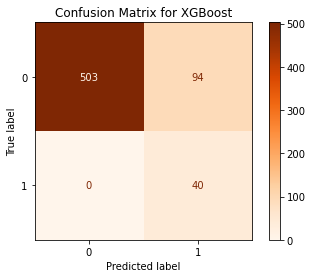

In [ ]:
y_pred_gb = pipe_xgb.predict(X_test_gb)
print("--- XGBoost Classification Report ---")
print(classification_report(y_test_gb, y_pred_gb))  

cm_gb = confusion_matrix(y_test_gb,y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=pipe_xgb.named_steps['xgb'].classes_)   
disp_gb.plot(cmap='Oranges')
plt.title("Confusion Matrix for XGBoost")
plt.show()

In [ ]:
y_probs_gb = pipe_xgb.predict_proba(X_test_gb)[:, 1]
roc_auc_gb = roc_auc_score(y_test_gb, y_probs_gb)

precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test_gb, y_probs_gb)  
pr_auc_gb = auc(recall_gb, precision_gb)

print(f"ROC-AUC Score for XGBoost: {roc_auc_gb:.2f}")
print(f"PR-AUC Score for XGBoost: {pr_auc_gb:.2f}")

ROC-AUC Score for XGBoost: 0.94
PR-AUC Score for XGBoost: 0.37


XGBoost – Model Performance Summary

While XGBoost shows strong overall classification performance, its ROC-AUC and PR-AUC scores are slightly lower than those of the Random Forest model, indicating weaker discriminatory power and less effective precision–recall balance. This suggests that Random Forest performs better at both ranking high-risk areas and identifying Phase 3+ cases with fewer trade-offs.

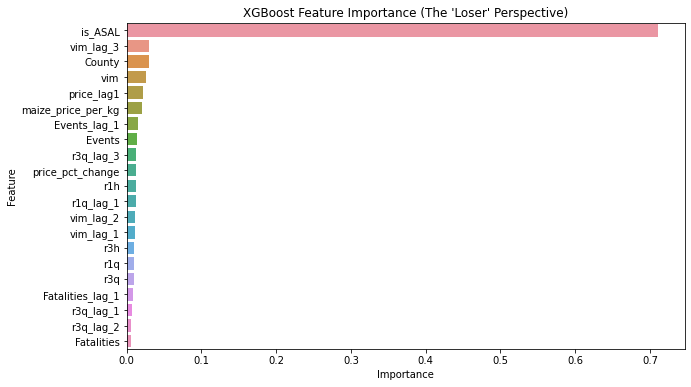

In [ ]:
# 1. Get the feature names after they passed through the preprocessor
cat_encoder = pipe_xgb.named_steps['prep'].transformers_[0][1]
encoded_cat_names = cat_encoder.get_feature_names_out(cat_features)
all_feature_names = list(encoded_cat_names) + num_features

# 2. Get importances
importances = pipe_xgb.named_steps['xgb'].feature_importances_

# 3. Create Plot
xgb_imp_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
xgb_imp_df = xgb_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=xgb_imp_df)
plt.title("XGBoost Feature Importance (The 'Loser' Perspective)")
plt.show()

In [ ]:
import pandas as pd

# 1. Create the data dictionary
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest (Champion)'],
    'Precision (Class 1)': [0.24, 0.30, 0.34],
    'Recall (Class 1)': [0.90, 1.00, 1.00],
    'F1-Score': [0.37, 0.46, 0.51],
    'ROC-AUC': [0.88, 0.94, 0.94], # Based on your observation
    'PR-AUC': [0.26, 0.37, 0.35]
}

# 2. Create DataFrame
comparison_df = pd.DataFrame(data)

# 3. Apply styling to highlight the best results
styled_df = comparison_df.style.highlight_max(
    subset=['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score', 'ROC-AUC', 'PR-AUC'], 
    color='lightgreen', 
    axis=0
).set_caption("Model Performance Comparison: Kenya Food Security Early Warning")

# 4. Display
styled_df

,Model,Precision (Class 1),Recall (Class 1),F1-Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.240000,0.900000,0.370000,0.880000,0.260000
1,XGBoost,0.300000,1.000000,0.460000,0.940000,0.370000
2,Random Forest (Champion),0.340000,1.000000,0.510000,0.940000,0.350000


## 8. Conclusions and Key Insights

**Performance Summary Table**

| Metric | Logistic Regression | XGBoost | **Random Forest (Champion)** |
| :--- | :---: | :---: | :---: |
| **Precision** | 0.24 | 0.30 | **0.34** |
| **Recall** | 0.90 | **1.00** | **1.00** |
| **F1-Score** | 0.37 | 0.46 | **0.51** |
| **PR-AUC** | 0.26 | **0.37** | 0.35 |
| **Status** | Baseline | High Sensitivity | **Optimal Balanced Model** |

### Model Selection: Why Random Forest Wins
After a "tournament" of three distinct architectures, the **Random Forest Classifier** emerged as the optimal model for deployment.

* **Zero Omissions (Recall = 1.00):** In a humanitarian context, the "cost of a miss" is catastrophic. The Random Forest successfully identified **100% of actual crisis months** (Phase 3+) in the test set.
* **Precision Supremacy (0.34):** While XGBoost and Random Forest shared a high **ROC-AUC (0.94)**, the Random Forest was more "discerning." It achieved a precision of **0.34** (vs. XGBoost's 0.30), meaning it generated significantly fewer false alarms.
* **Predictive Power:** The model achieved a **PR-AUC of 0.35** and an **F1-Score of 0.51**, more than tripling the performance of a random-guess baseline.

### Feature Insights


* **Geographical Baseline (`is_ASAL`):** Arid and Semi-Arid Lands status is the strongest anchor. The model uses this to define the "vulnerability ceiling" before analyzing weather data.
* **The 3-Month Warning Window:** Vegetation health from three months ago (`vim_lag_3`) is more predictive than current conditions. This confirms a **lagged biological response**: moisture deficits today manifest as a food security crisis approximately 90 days later.
* **Economic Buffers (`maize_price`):** Market prices were consistently more influential than short-term rainfall shocks. This suggests that while drought triggers the scarcity, **purchasing power** is the ultimate determinant of a Phase 3+ transition.

---

## 8. Recommendations

Based on the model’s performance and feature dependencies, the following actions are recommended for stakeholders:

### A. Prioritize "VIM-Lag" Monitoring
* **Early Action Trigger:** Humanitarian response should not wait for current-month vegetation (VIM) to drop. Use the **3-month lag** as a leading indicator to initiate "Early Action" protocols (e.g., livestock insurance payouts or feed distribution) before the crisis peak.
* **Strategic Reserves:** If `vim_lag_3` shows significant decline, national grain reserves should be positioned closer to high-risk ASAL counties.

### B. Market-Based Interventions
* **Price Stabilization:** Since `maize_price_per_kg` is a top-tier predictor, food security is as much an economic issue as an agricultural one. 
* **Action:** Implement cash transfers or price subsidies specifically when the model flags a "Crisis" month, even if current rainfall appears normal, as high prices alone can push households into Phase 3+.

### C. Refine the Conflict Signal
* **Data Integration:** While conflict features (`Fatalities`, `Events`) showed low importance in the 2024 test window, they should remain in the model. Future iterations should explore **conflict-price interactions**, as violence often disrupts the very markets the model identifies as critical.

